In [1]:
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
accepted_data = pd.read_csv("C:/Users/david/Downloads/accepted_2007_to_2018Q4.csv.gz")  
print(accepted_data.columns.tolist())

C:\Users\david\AppData\Local\Temp\ipykernel_28576\380072024.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_data = pd.read_csv("C:/Users/david/Downloads/accepted_2007_to_2018Q4.csv.gz")


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [3]:
accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
clean_data = accepted_data

In [5]:
missing_percent = clean_data.isnull().mean()  # fraction of missing per column
threshold = 0.5  # remove columns with >50% missing values
columns_to_drop = missing_percent[missing_percent > threshold].index
accepted = accepted_data.drop(columns=columns_to_drop)
clean_data_2 = accepted

In [6]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # adjust threshold as needed
accepted_numeric = accepted.select_dtypes(include=['float', 'int'])  # logistic regression only uses numeric
selector.fit(accepted_numeric.fillna(0))  # fill NaNs temporarily
low_variance_cols = accepted_numeric.columns[~selector.get_support()]
accepted_2 = accepted.drop(columns=low_variance_cols)
clean_data_3 = accepted_2

In [7]:
clean_data_3['debt_settlement_flag'].unique()
clean_data_3['debt_settlement_flag_numeric'] = clean_data_3['debt_settlement_flag'].map({'Y': 1, 'N': 0})
clean_data_3['debt_settlement_flag_numeric'] = clean_data_3['debt_settlement_flag_numeric'].fillna(0)

In [8]:
numeric_data = clean_data_3.select_dtypes(include=['float64', 'int64']).copy()
corr_matrix = numeric_data.corr()
corr_with_target = corr_matrix['debt_settlement_flag_numeric']
important_features = corr_with_target[abs(corr_with_target) > 0.05].index
clean_data_4 = numeric_data[important_features]

In [9]:
clean_data_4.head()

,int_rate,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,debt_settlement_flag_numeric
0,13.99,0.00,0.00,3600.00,0.0,0.0,0.0,122.67,564.0,560.0,0.0
1,11.99,0.00,0.00,24700.00,0.0,0.0,0.0,926.35,699.0,695.0,0.0
2,10.78,0.00,0.00,20000.00,0.0,0.0,0.0,15813.30,704.0,700.0,0.0
3,14.85,15897.65,15897.65,19102.35,0.0,0.0,0.0,829.90,679.0,675.0,0.0
4,22.45,0.00,0.00,10400.00,0.0,0.0,0.0,10128.96,704.0,700.0,0.0


In [10]:
num_rows = clean_data_4.shape[0]
print(num_rows)

2260701


In [11]:
threshold = 1  # fraction of data required
min_non_na = int(threshold * clean_data_4.shape[1])

clean_data_5 = clean_data_4.dropna(thresh=min_non_na)

In [12]:
num_rows = clean_data_5.shape[0]
print(num_rows)

2260668


In [13]:
df = clean_data_5

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
print(clean_data_5.columns.tolist())

['int_rate', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'debt_settlement_flag_numeric']


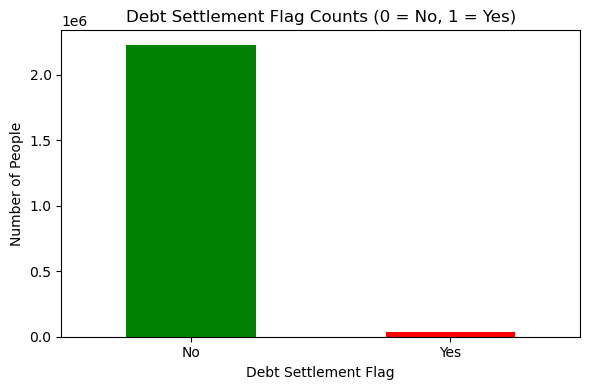

In [16]:
status_counts = clean_data_5['debt_settlement_flag_numeric'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
status_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Debt Settlement Flag')
plt.ylabel('Number of People')
plt.title('Debt Settlement Flag Counts (0 = No, 1 = Yes)')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\david\Downloads\Debt Settlement Flag Counts (0 = No, 1 = Yes).png")
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

df['debt_settlement_flag_numeric'] = (df['debt_settlement_flag_numeric'].fillna(0).astype(float) > 0).astype(int)


categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Split features and target
X = df.drop('debt_settlement_flag_numeric', axis=1)
y = df['debt_settlement_flag_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Random Forest
model = RandomForestClassifier(random_state=42)

# Train
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:\n", importance_df)

C:\Users\david\AppData\Local\Temp\ipykernel_28576\3484810942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['debt_settlement_flag_numeric'] = (df['debt_settlement_flag_numeric'].fillna(0).astype(float) > 0).astype(int)


Accuracy: 0.9918011032127644

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    445282
           1       0.84      0.56      0.68      6852

    accuracy                           0.99    452134
   macro avg       0.92      0.78      0.84    452134
weighted avg       0.99      0.99      0.99    452134


Confusion Matrix:
 [[444565    717]
 [  2990   3862]]

Top Features:
                    Feature  Importance
6  collection_recovery_fee    0.217688
7          last_pymnt_amnt    0.210901
5               recoveries    0.186241
3          total_rec_prncp    0.140968
0                 int_rate    0.082070
4       total_rec_late_fee    0.051931
9      last_fico_range_low    0.049823
8     last_fico_range_high    0.047758
2            out_prncp_inv    0.006412
1                out_prncp    0.006207


In [18]:
print("Unique classes in y:", df['debt_settlement_flag_numeric'].nunique())
print(df['debt_settlement_flag_numeric'].value_counts(dropna=False).head(30))

Unique classes in y: 2
debt_settlement_flag_numeric
0    2226422
1      34246
Name: count, dtype: int64


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Optional: scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso logistic regression
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
lasso.fit(X_scaled, y)

# Inspect coefficients
coef = pd.Series(lasso.coef_[0], index=X.columns)
print(coef.sort_values())

last_pymnt_amnt           -7.568374
out_prncp_inv             -1.615747
last_fico_range_high      -0.932379
out_prncp                 -0.885721
recoveries                -0.206804
int_rate                  -0.050781
total_rec_prncp            0.060572
total_rec_late_fee         0.134940
last_fico_range_low        0.326457
collection_recovery_fee    0.654339
dtype: float64


In [20]:
zero_coef_vars = [] # no justification to remove more columns 

# Drop these columns from your dataset
df_reduced = df.drop(columns=zero_coef_vars)

# Check remaining columns
print(df_reduced.columns)

Index(['int_rate', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'debt_settlement_flag_numeric'],
      dtype='object')


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

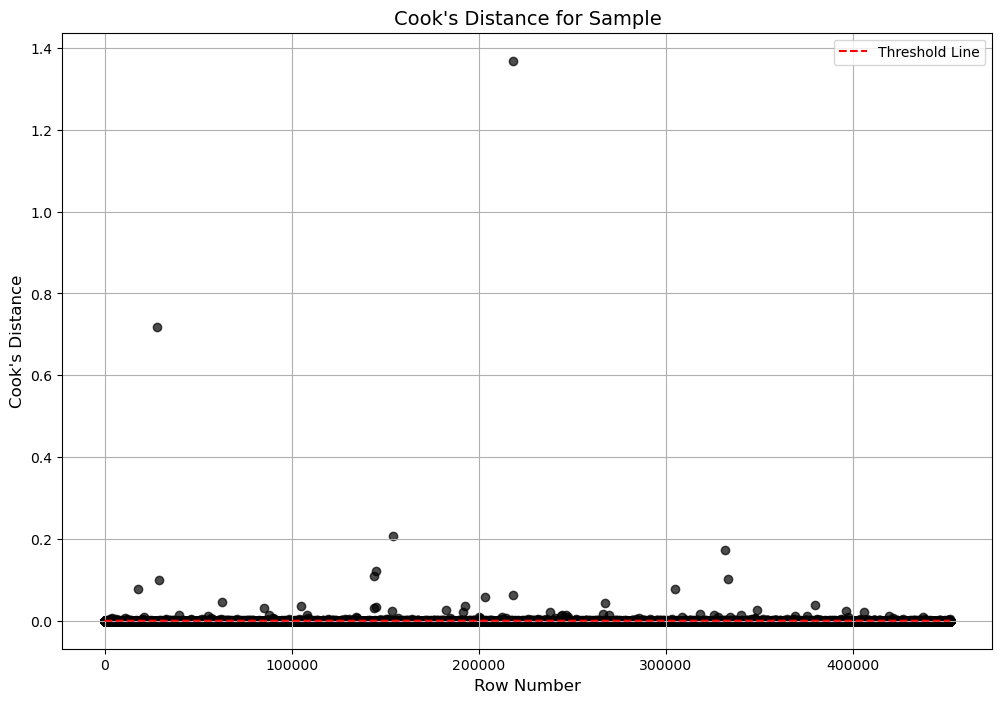

In [22]:
df_sample = df_reduced.sample(frac=0.2, random_state=42).reset_index(drop=True)

X = df_sample.drop('debt_settlement_flag_numeric', axis=1)
y = df_sample['debt_settlement_flag_numeric']

# Add constant
X_const = sm.add_constant(X)

# Fit OLS
model = sm.OLS(y.astype(float), X_const.astype(float)).fit()

# Get influence
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Convert Cook's distance to Series with df_sample index
cooks_series = pd.Series(cooks_d, index=df_sample.index)

# Mean Cook's distance line
mean_cooks = np.mean(cooks_series)
threshold_line = [4 * mean_cooks] * len(df_sample)

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(df_sample.index, cooks_series, alpha=0.7, color="black")
plt.plot(df_sample.index, threshold_line, color="red", linestyle="--", label="Threshold Line")
plt.xlabel("Row Number", fontsize=12)
plt.ylabel("Cook's Distance", fontsize=12)
plt.title("Cook's Distance for Sample", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig(r"C:\Users\david\Downloads\Cook's Distance for Sample.png")
plt.show()

In [23]:
top_10_cooks = cooks_series.nlargest(10).to_frame(name="Cook's Distance")
top_10_cooks.index.name = "Row Index"

print(top_10_cooks)

           Cook's Distance
Row Index                 
218374            1.368851
28206             0.717979
154164            0.206306
331520            0.172100
145187            0.120479
143866            0.110307
333582            0.102893
29224             0.100542
304869            0.078687
17619             0.076405


Removing 0 perfect/near-perfect predictors: []
Non-zero coefficients:
 int_rate                  -0.056604
out_prncp                 -0.973114
out_prncp_inv             -1.908580
total_rec_prncp            0.054685
total_rec_late_fee         0.135138
recoveries                -0.259352
collection_recovery_fee    0.703340
last_pymnt_amnt           -7.412591
last_fico_range_high      -0.919000
last_fico_range_low        0.341397
dtype: float64


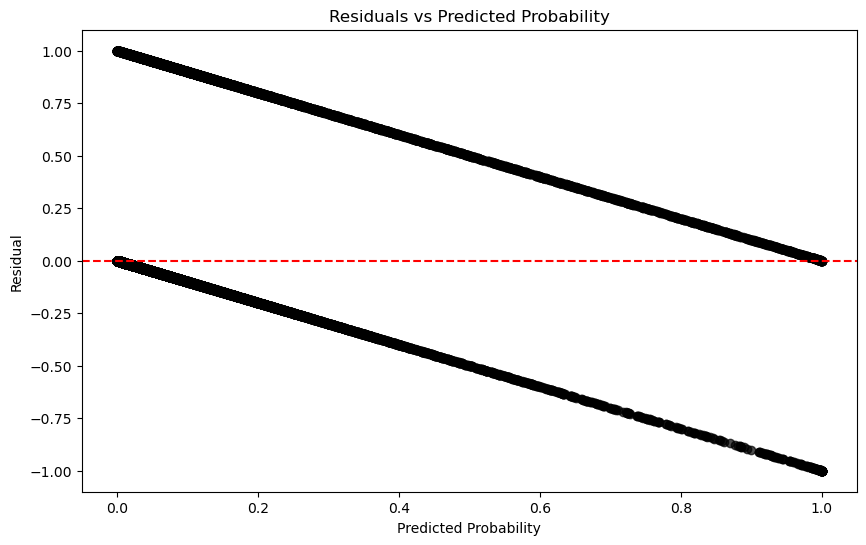

In [24]:
target_col = "debt_settlement_flag_numeric"  # Change this to your actual target column
X = df_sample.drop(columns=['debt_settlement_flag_numeric'])
y = df_sample['debt_settlement_flag_numeric']


# 2. Handle NaN values
# Option A: Fill NaN with median
X = X.fillna(X.median())

# 3. Remove perfect / near-perfect predictors
perfect_predictors = []
threshold = 0.98  # near-perfect threshold

for col in X.columns:
    # Skip non-numeric
    if not np.issubdtype(X[col].dtype, np.number):
        continue
    
    # Correlation with target (for binary y)
    corr = np.corrcoef(X[col], y)[0, 1]
    if abs(corr) >= threshold or X[col].nunique() == len(X[y == 1]) or X[col].nunique() == len(X[y == 0]):
        perfect_predictors.append(col)

print(f"Removing {len(perfect_predictors)} perfect/near-perfect predictors: {perfect_predictors}")
X = X.drop(columns=perfect_predictors)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. L1 Logistic Regression (Lasso)
# C = 1 / alpha → smaller C = stronger regularization
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.5, random_state=42)
lasso.fit(X_train, y_train)

# 7. Coefficients
coef = pd.Series(lasso.coef_[0], index=X.columns)
print("Non-zero coefficients:\n", coef[coef != 0])

# 8. Residual plot
pred_probs = lasso.predict_proba(X_train)[:, 1]
residuals = y_train - pred_probs

plt.figure(figsize=(10, 6))
plt.scatter(pred_probs, residuals, alpha=0.7, color='black')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Probability")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted Probability")
plt.savefig(r"C:\Users\david\Downloads\Residuals vs Predicted Probability.png")
plt.show()

In [25]:
abs_residuals = np.abs(residuals)
top_10_indices = abs_residuals.nlargest(10).index

# Create a small table
top_10_residuals = pd.DataFrame({
    'Row Index': top_10_indices,
    'Residual': residuals.loc[top_10_indices]
}).reset_index(drop=True)

print(top_10_residuals)

   Row Index  Residual
0     206984       1.0
1      80479       1.0
2     218374      -1.0
3     412983       1.0
4      28206      -1.0
5     438689       1.0
6     235189       1.0
7     400411       1.0
8     154164      -1.0
9     214161       1.0


In [26]:
intersection = list(set(top_10_residuals) & set(top_10_cooks))

print(intersection)

[]


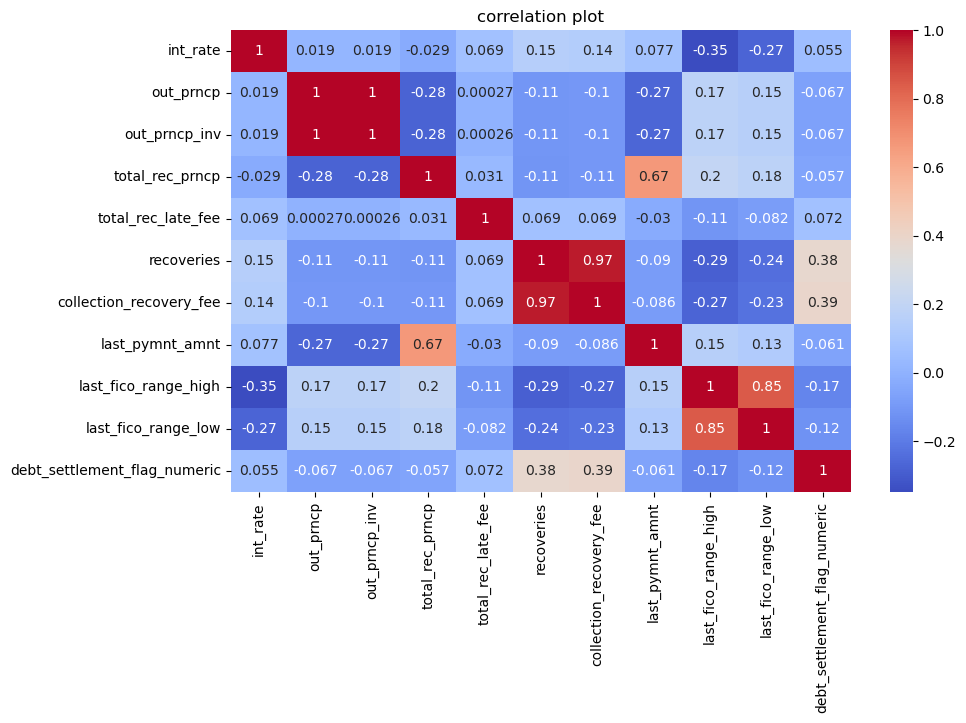

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_reduced.corr()

#print(corr_matrix)
plt.figure(figsize=(10, 6))
plt.title('correlation plot')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig(r"C:\Users\david\Downloads\correlation plot.png")
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column for intercept
X = add_constant(df_reduced)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                        Variable            VIF
0                          const     161.730830
1                       int_rate       1.196802
2                      out_prncp  408457.385546
3                  out_prncp_inv  408452.709068
4                total_rec_prncp       1.919311
5             total_rec_late_fee       1.027554
6                     recoveries      17.539368
7        collection_recovery_fee      17.538874
8                last_pymnt_amnt       1.888300
9           last_fico_range_high       3.948403
10           last_fico_range_low       3.529668
11  debt_settlement_flag_numeric       1.195325


In [29]:
df_reduced = df_reduced.copy()

# Create the average column
df_reduced['fico_avg'] = (
    df_reduced['last_fico_range_high'] + df_reduced['last_fico_range_low']
) / 2

# Drop the old columns
df_final = df_reduced.drop(columns=['out_prncp_inv', 'collection_recovery_fee', 'last_fico_range_high', 'last_fico_range_low'])

# Check column names
print(df_final.columns.tolist())

['int_rate', 'out_prncp', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'debt_settlement_flag_numeric', 'fico_avg']


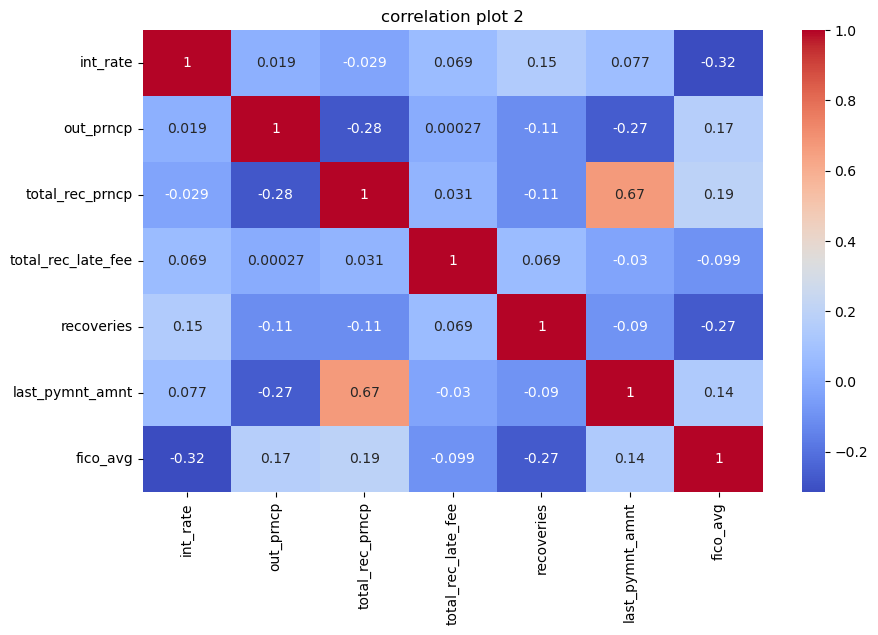

In [30]:
predictors = df_final.drop(columns=['debt_settlement_flag_numeric'])  # drop target
corr_matrix = predictors.corr()

#print(corr_matrix)
plt.figure(figsize=(10, 6))
plt.title('correlation plot 2')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig(r"C:\Users\david\Downloads\correlation plot 2.png")
plt.show()

In [31]:
X = add_constant(predictors)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

             Variable        VIF
0               const  97.263983
1            int_rate   1.160235
2           out_prncp   1.195233
3     total_rec_prncp   1.915648
4  total_rec_late_fee   1.022226
5          recoveries   1.104830
6     last_pymnt_amnt   1.882655
7            fico_avg   1.299012


In [32]:
for col in df_final.columns:
    print(col, df_final[col].nunique())

int_rate 673
out_prncp 356141
total_rec_prncp 486463
total_rec_late_fee 18375
recoveries 132777
last_pymnt_amnt 704467
debt_settlement_flag_numeric 2
fico_avg 72


In [33]:
from sklearn.model_selection import train_test_split
predictors = df_final.drop(columns=['debt_settlement_flag_numeric'])
response = df_final['debt_settlement_flag_numeric']
X_train, X_temp, y_train, y_temp = train_test_split(predictors, response, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lg = LogisticRegression(C=0.01, random_state=42)
lg.fit(X_train, y_train)
lg_predictions = lg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lg_predictions))
print(classification_report(y_test, lg_predictions))

y_val_pred = lg.predict(X_val)

print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(classification_report(y_val, y_val_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, lg_predictions)) 

Logistic Regression Accuracy: 0.9855883645285622
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    333961
           1       0.64      0.11      0.19      5140

    accuracy                           0.99    339101
   macro avg       0.81      0.56      0.59    339101
weighted avg       0.98      0.99      0.98    339101

Validation Accuracy: 0.9854379239162488
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    333889
           1       0.65      0.12      0.20      5211

    accuracy                           0.99    339100
   macro avg       0.82      0.56      0.59    339100
weighted avg       0.98      0.99      0.98    339100


Confusion Matrix:
 [[333624    337]
 [  4550    590]]


In [36]:
import statsmodels.api as sm

# Add constant (intercept)
X_train_const = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Summary includes coefficients, standard errors, z-scores, and p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.052109
         Iterations 13
                                Logit Regression Results                                
Dep. Variable:     debt_settlement_flag_numeric   No. Observations:              1582467
Model:                                    Logit   Df Residuals:                  1582459
Method:                                     MLE   Df Model:                            7
Date:                          Mon, 18 Aug 2025   Pseudo R-squ.:                  0.3345
Time:                                  14:29:42   Log-Likelihood:                -82461.
converged:                                 True   LL-Null:                   -1.2391e+05
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.2986      

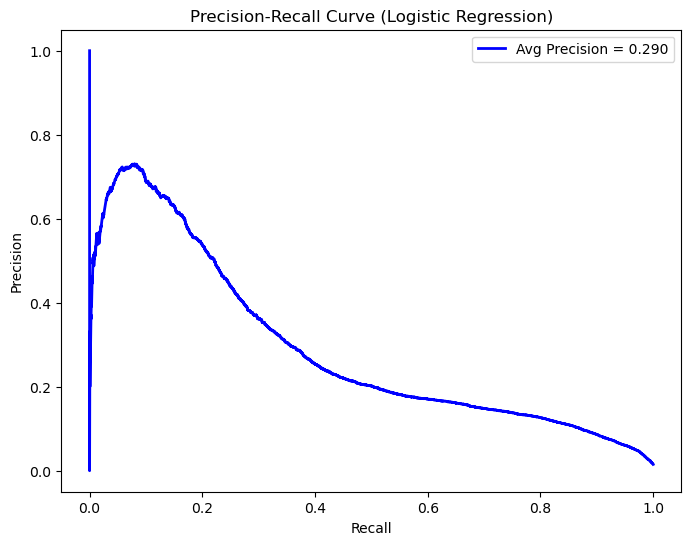

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color="blue", linewidth=2,
         label=f"Avg Precision = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.legend()
plt.savefig(r"C:\Users\david\Downloads\Precision-Recall Curve.png")
plt.show()

In [38]:
pos_rate = y_test.mean()   # proportion of positives
neg_rate = 1 - pos_rate

print(f"Positive class: {pos_rate*100:.2f}%")
print(f"Negative class: {neg_rate*100:.2f}%")

Positive class: 1.52%
Negative class: 98.48%


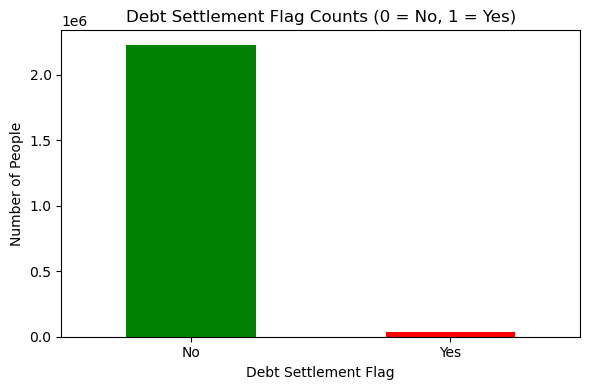

In [39]:
status_counts = df_final['debt_settlement_flag_numeric'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
status_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Debt Settlement Flag')
plt.ylabel('Number of People')
plt.title('Debt Settlement Flag Counts (0 = No, 1 = Yes)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

In [61]:
from imblearn.over_sampling import SMOTE

# Oversample training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After:", pd.Series(y_train_res).value_counts())

Before: debt_settlement_flag_numeric
0    1558495
1      23972
Name: count, dtype: int64
After: debt_settlement_flag_numeric
0    1558495
1    1558495
Name: count, dtype: int64


In [56]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [57]:
lg = LogisticRegression(C=0.01, random_state=42)
lg.fit(X_train_res, y_train_res)

# Evaluate on validation set
y_val_pred = lg.predict(X_val_scaled)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(classification_report(y_val, y_val_pred))

# Final evaluation on test set
y_test_pred = lg.predict(X_test_scaled)

print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred)) 

Validation Accuracy: 0.8796284281922737
              precision    recall  f1-score   support

           0       1.00      0.88      0.93    333963
           1       0.11      0.93      0.19      5137

    accuracy                           0.88    339100
   macro avg       0.55      0.91      0.56    339100
weighted avg       0.99      0.88      0.92    339100

Test Accuracy: 0.8803158940846533
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    333964
           1       0.11      0.93      0.19      5137

    accuracy                           0.88    339101
   macro avg       0.55      0.91      0.56    339101
weighted avg       0.99      0.88      0.92    339101


Confusion Matrix:
 [[293717  40247]
 [   338   4799]]


In [62]:
import statsmodels.api as sm

# Add constant (intercept)
X_train_const = sm.add_constant(X_train_res)

logit_model = sm.Logit(y_train_res, X_train_const)
result = logit_model.fit()

# Summary includes coefficients, standard errors, z-scores, and p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.301458
         Iterations 9
                                Logit Regression Results                                
Dep. Variable:     debt_settlement_flag_numeric   No. Observations:              3116990
Model:                                    Logit   Df Residuals:                  3116982
Method:                                     MLE   Df Model:                            7
Date:                          Mon, 18 Aug 2025   Pseudo R-squ.:                  0.5651
Time:                                  16:33:08   Log-Likelihood:            -9.3964e+05
converged:                                 True   LL-Null:                   -2.1605e+06
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const       

AUC: 0.9464


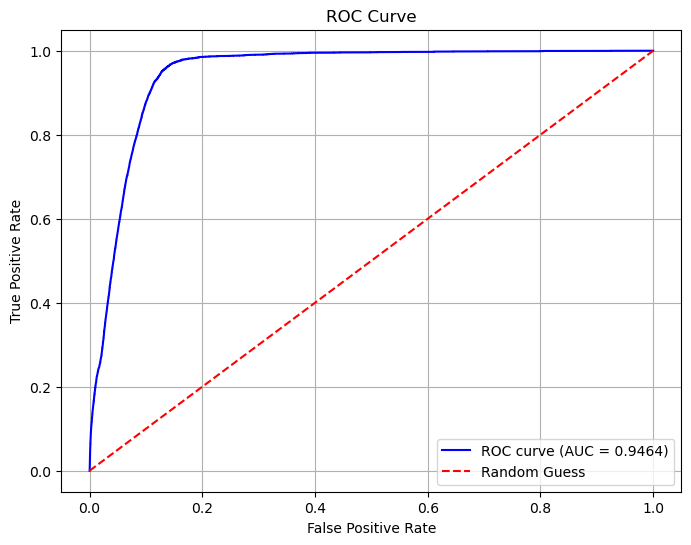

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (1)
y_test_prob = lg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Compute AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_test_prob)
print(f"AUC: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig(r"C:\Users\david\Downloads\ROC Curve.png")
plt.show()

In [65]:
y_val_probs = lg.predict_proba(X_val_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)

# Compute Youden's J statistic
J = tpr - fpr
ix = np.argmax(J)
best_threshold = thresholds[ix]

print(f"Best Threshold (Youden's J): {best_threshold:.4f}")
print(f"TPR: {tpr[ix]:.3f}, FPR: {fpr[ix]:.3f}")

Best Threshold (Youden's J): 0.4337
TPR: 0.958, FPR: 0.136


In [66]:
best_threshold = 0.4337

# Predict with new threshold
y_val_probs = lg.predict_proba(X_val_scaled)[:, 1]
y_val_custom = (y_val_probs >= best_threshold).astype(int)

print("Validation report at optimal threshold:")
print(classification_report(y_val, y_val_custom))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_custom))

Validation report at optimal threshold:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93    333963
           1       0.10      0.96      0.18      5137

    accuracy                           0.87    339100
   macro avg       0.55      0.91      0.55    339100
weighted avg       0.99      0.87      0.92    339100

Confusion Matrix:
 [[288537  45426]
 [   215   4922]]
